## Introduction
Recommender systems are powerful tools used to generate personalized recommendations for users. These systems are crucial in various domains, such as online shopping, streaming services, and social media, to help users discover content that aligns with their interests. The two main types of recommender systems are collaborative filtering and content-based filtering, with a third approach known as a hybrid engine combining elements of both.

## Collaborative Filtering
Collaborative filtering leverages user interaction data, such as ratings or preferences, to generate recommendations. This method suggests movies (or other items) that a user hasn't watched but that similar users have enjoyed. To determine user similarity, the algorithm compares the movies both users have watched and how they rated them. By analyzing these commonalities, the system predicts the potential rating a user might give to an unseen movie, using the ratings of users with similar tastes.

## Content-Based Filtering
Content-based filtering focuses solely on the preferences of the individual user, without considering the behavior of others. This approach recommends movies or items that are similar to those the user has previously enjoyed. The algorithm analyzes the characteristics of the content—such as genre, director, or actors in the case of movies—and suggests items that match the user's known preferences.

## Hybrid Engine
A hybrid engine combines elements from both collaborative and content-based filtering. By integrating the strengths of these two approaches, a hybrid engine offers more accurate and personalized recommendations. It generates movie suggestions for a specific user based on estimated ratings calculated from both the user's preferences and the behavior of similar users.

In [49]:
import re
import nltk
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from ast import literal_eval
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.font_manager import FontProperties
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import plotly
import plotly.io as pio
from os import path
from PIL import Image
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', 50)

# IMPORT DATASET


In [51]:
movies = pd.read_csv("IMDB TMDB Movie Metadata Big Dataset (1M).csv")

In [52]:
movies.head()

id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path     budget  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  160000000   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  165000000   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  185000000   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  237000000   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  220000000   

                                         homepage    imdb_id  \
0     https://www.warnerbros.com/movies/inception  tt1375666   
1               http://www.interstellarmovie.net/  tt0816692   
2  https://www.warnerbros.com/movies/dark-knight/  tt0468569   
3            https://www.avatar.com/movies/avatar  tt0499549   
4      https://www.marvel.com/movies/the-avengers  tt0848228   

  original_language   original_title  \
0                en        Inception   
1                en     Interstellar   
2                en  The Dark Knight   
3                en           Avatar   
4                en     The Avengers   

                                            overview  popularity  \
0  Cobb, a skilled thief who commits corporate es...      83.952   
1  The adventures of a group of explorers who mak...     140.241   
2  Batman raises the stakes in his war on crime. ...     130.643   
3  In the 22nd century, a paraplegic Marine is di...      79.932   
4  When an unexpected enemy emerges and threatens...      98.082   

                        poster_path  \
0  /oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg   
1  /gEU2QniE6E77NI6lCU6MxlNBvIx.jpg   
2  /qJ2tW6WMUDux911r6m7haRef0WH.jpg   
3  /kyeqWdyUXW608qlYkRqosgbbJyK.jpg   
4   /RYMX2wcKCBAr24UyPD7xwmjaTn.jpg   

                                             tagline  \
0               Your mind is the scene of the crime.   
1  Mankind was born on Earth. It was never meant ...   
2                  Welcome to a world without rules.   
3                        Enter the world of Pandora.   
4                            Some assembly required.   

                                production_companies  \
0  Legendary Pictures, Syncopy, Warner Bros. Pict...   
1  Legendary Pictures, Syncopy, Lynda Obst Produc...   
2  DC Comics, Legendary Pictures, Syncopy, Isobel...   
3  Dune Entertainment, Lightstorm Entertainment, ...   
4                                     Marvel Studios   

                       production_countries  \
0  United Kingdom, United States of America   
1  United Kingdom, United States of America   
2  United Kingdom, United States of America   
3  United States of America, United Kingdom   
4                  United States of America   

                     spoken_languages  \
0  English, French, Japanese, Swahili   
1                             English   
2                   English, Mandarin   
3                    English, Spanish   
4             English, Hindi, Russian   

                                            keywords  release_year  \
0  ['rescue', 'mission', 'dream', 'airplane', 'pa...        2010.0   
1  ['rescue', 'future', 'spacecraft', 'race again...        2014.0   
2  ['joker', 'sadism', 'chaos', 'secret identity'...        2008.0   
3  ['future', 'society', 'culture clash', 'space ...        2009.0   
4  ['new york city', 'superhero', 'shield', 'base...        2012.0   

            Director  AverageRating  \
0  Christopher Nolan            8.8   
1  Christopher Nolan            8.7   
2  Christopher Nolan            9.0   
3      James

In [53]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072255 entries, 0 to 1072254
Data columns (total 42 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1072255 non-null  int64  
 1   title                    1072255 non-null  object 
 2   vote_average             1072255 non-null  float64
 3   vote_count               1072255 non-null  int64  
 4   status                   1072255 non-null  object 
 5   release_date             921699 non-null   object 
 6   revenue                  1072255 non-null  int64  
 7   runtime                  1072255 non-null  int64  
 8   adult                    1072255 non-null  bool   
 9   backdrop_path            292826 non-null   object 
 10  budget                   1072255 non-null  int64  
 11  homepage                 115519 non-null   object 
 12  imdb_id                  589364 non-null   object 
 13  original_language        1072255 non-null 

# DATA PREPARATION


In [55]:
#Getting the Whole Cast Together
movies['Star1'].fillna('',inplace = True)
movies['Star2'].fillna('',inplace = True)
movies['Star3'].fillna('',inplace = True)
movies['Star4'].fillna('',inplace = True)
movies['Cast_list'].fillna('',inplace = True)
movies['Cast_list'] = movies['Cast_list'].apply(literal_eval)

In [56]:
def combine_cast(row):
    """
    Combines the star columns and Cast_list into a single list, filtering out empty values.
    """
    # Combine columns into a list
    cast_list = [row['Star1'], row['Star2'], row['Star3'], row['Star4'], row['Cast_list']]
    
    # Filter out empty strings
    return [cast for cast in cast_list if cast]

# Apply the function to each row
movies['cast'] = movies.apply(combine_cast, axis=1)

# SELECTING REQUIRED DATA


In [58]:
MoviesList = movies[['id','original_title','title','cast', 'Director', 'keywords', 'genres_list', 'release_date', 'overview', 
             'original_language', 'adult', 'runtime', 'tagline', 'vote_average', 'vote_count','popularity']]

In [59]:
MoviesList.head()

id   original_title            title  \
0   27205        Inception        Inception   
1  157336     Interstellar     Interstellar   
2     155  The Dark Knight  The Dark Knight   
3   19995           Avatar           Avatar   
4   24428     The Avengers     The Avengers   

                                                cast           Director  \
0  [Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...  Christopher Nolan   
1  [Matthew McConaughey, Anne Hathaway, Jessica C...  Christopher Nolan   
2  [Christian Bale, Heath Ledger, Aaron Eckhart, ...  Christopher Nolan   
3  [Sam Worthington, Zoe Saldana, Sigourney Weave...      James Cameron   
4  [Robert Downey Jr., Chris Evans, Scarlett Joha...        Joss Whedon   

                                            keywords  \
0  ['rescue', 'mission', 'dream', 'airplane', 'pa...   
1  ['rescue', 'future', 'spacecraft', 'race again...   
2  ['joker', 'sadism', 'chaos', 'secret identity'...   
3  ['future', 'society', 'culture clash', 'space ...   
4  ['new york city', 'superhero', 'shield', 'base...   

                                         genres_list release_date  \
0         ['Action', 'Science Fiction', 'Adventure']   2010-07-15   
1          ['Adventure', 'Drama', 'Science Fiction']   2014-11-05   
2           ['Drama', 'Action', 'Crime', 'Thriller']   2008-07-16   
3  ['Action', 'Adventure', 'Fantasy', 'Science Fi...   2009-12-15   
4         ['Science Fiction', 'Action', 'Adventure']   2012-04-25   

                                            overview original_language  adult  \
0  Cobb, a skilled thief who commits corporate es...                en  False   
1  The adventures of a group of explorers who mak...                en  False   
2  Batman raises the stakes in his war on crime. ...                en  False   
3  In the 22nd century, a paraplegic Marine is di...                en  False   
4  When an unexpected enemy emerges and threatens...                en  False   

   runtime                                            tagline  vote_average  \
0      148               Your mind is the scene of the crime.         8.364   
1      169  Mankind was born on Earth. It was never meant ...         8.417   
2      152                  Welcome to a world without rules.         8.512   
3      162                        Enter the world of Pandora.         7.573   
4      143                            Some assembly required.         7.710   

   vote_count  popularity  
0       34495      83.952  
1       32571     140.241  
2       30619     130.643  
3       29815      79.932  
4       29166      98.082

In [60]:
MoviesList["cast"]

0          [Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...
1          [Matthew McConaughey, Anne Hathaway, Jessica C...
2          [Christian Bale, Heath Ledger, Aaron Eckhart, ...
3          [Sam Worthington, Zoe Saldana, Sigourney Weave...
4          [Robert Downey Jr., Chris Evans, Scarlett Joha...
                                 ...                        
1072250                     [[Chu Tien-wen, Chu Tʽien-hsin]]
1072251    [[Robbie, Suzanne Sole, Peter Bisuito, Robert ...
1072252       [[Jude Thomas, Robyn Miller, Spencer Kennedy]]
1072253    [[Matthew Pineda, Adam Dalupang, Julie Sayo, N...
1072254                                          [[Unknown]]
Name: cast, Length: 1072255, dtype: object

In [61]:
# Missing Value
MoviesList.isna().sum()


id                        0
original_title            0
title                     0
cast                      0
Director                  0
keywords                  0
genres_list               0
release_date         150556
overview             202181
original_language         0
adult                     0
runtime                   0
tagline              919472
vote_average              0
vote_count                0
popularity                0
dtype: int64

In [62]:
#SUBSTITUTING NULL VALUES
MoviesList["overview"].fillna('',inplace = True)
MoviesList.loc[MoviesList.overview == 'No overview found.','overview'] = ''
MoviesList["tagline"].fillna('',inplace = True)
MoviesList.loc[MoviesList['release_date'].isna(),'release_date'] = '2050-01-01'
MoviesList.release_date = pd.to_datetime(MoviesList.release_date,format = '%Y-%m-%d')
MoviesList["genres_list"] = MoviesList["genres_list"].astype(str).apply(literal_eval)
MoviesList["keywords"] = MoviesList["keywords"].astype(str).apply(literal_eval)

In [63]:
MoviesList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072255 entries, 0 to 1072254
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1072255 non-null  int64         
 1   original_title     1072255 non-null  object        
 2   title              1072255 non-null  object        
 3   cast               1072255 non-null  object        
 4   Director           1072255 non-null  object        
 5   keywords           1072255 non-null  object        
 6   genres_list        1072255 non-null  object        
 7   release_date       1072255 non-null  datetime64[ns]
 8   overview           1072255 non-null  object        
 9   original_language  1072255 non-null  object        
 10  adult              1072255 non-null  bool          
 11  runtime            1072255 non-null  int64         
 12  tagline            1072255 non-null  object        
 13  vote_average       1072255 

# DATA PREPROCESSING


In [65]:
MoviesList = MoviesList.sort_values(by='popularity',axis=0, ascending=False)[0:20000].reset_index()
MoviesList=MoviesList.drop(['index'], axis=1)
MoviesList.head(5)

id                                     original_title  \
0  565770                                        Blue Beetle   
1  980489                                       Gran Turismo   
2  754720  巨乳上司と童貞部下が出張先の相部屋ホテルで…いたずら誘惑を真に受けた部下が10発射精の絶倫性...   
3  968051                                         The Nun II   
4  615656                                  Meg 2: The Trench   

                                               title  \
0                                        Blue Beetle   
1                                       Gran Turismo   
2  A Female Boss with Big Tits and Her Cherry Boy...   
3                                         The Nun II   
4                                  Meg 2: The Trench   

                                                cast            Director  \
0                                        [[Unknown]]             Unknown   
1  [Bill Paxton, [Madeline Taylor, Mark Margolis,...       Ron Underwood   
2  [[Stepan Sereda, Chris Kaye, Yuriy Tsurilo, Ko...   Dmitriy Dyachenko   
3  [[Simon Chandler, Francesca Annis, Richard Joh...  William Brookfield   
4  [Robert De Niro, [Roland Møller, Charlize Ther...          Tim Burton   

                                            keywords  \
0  [armor, superhero, family relationships, famil...   
1  [based on true story, racing, based on video g...   
2      [cheating, office, big tits, unfaithful wife]   
3  [france, bullying, sequel, religion, demon, go...   
4  [based on novel or book, sequel, shark, kaiju,...   

                            genres_list release_date  \
0  [Action, Science Fiction, Adventure]   2023-08-16   
1            [Action, Drama, Adventure]   2023-08-09   
2                               [Drama]   2020-01-16   
3           [Horror, Mystery, Thriller]   2023-09-06   
4     [Action, Science Fiction, Horror]   2023-08-02   

                                            overview original_language  adult  \
0  Recent college grad Jaime Reyes returns home f...                en  False   
1  The ultimate wish-fulfillment tale of a teenag...                en  False   
2  Yuzuru is this clumsy permavirgin employee who...                ja   True   
3  In 1956 France, a priest is violently murdered...                en  False   
4  An exploratory dive into the deepest depths of...                en  False   

   runtime                                            tagline  vote_average  \
0      128  Jaime Reyes is a superhero whether he likes it...         7.139   
1      135                               From gamer to racer.         8.068   
2      120                                                            9.000   
3      110                                 Confess your sins.         6.545   
4      116                                  Back for seconds.         6.912   

   vote_count  popularity  
0        1023    2994.357  
1         702    2680.593  
2          19    2020.286  
3         365    1692.778  
4        2034    1567.273

In [66]:
MoviesList["Director"]

0                     Unknown
1               Ron Underwood
2           Dmitriy Dyachenko
3          William Brookfield
4                  Tim Burton
                 ...         
19995          Bradley Cooper
19996     Alexander Grasshoff
19997             Saman Salur
19998    Richard Wolstencroft
19999       Penelope Spheeris
Name: Director, Length: 20000, dtype: object

In [67]:
MoviesList["plot_corpus"] = MoviesList["overview"]+MoviesList["tagline"]

def listtostr(txt):
    '''
    Returns string by joining the elements of the list
    '''
    
    txt_clean = ' '.join([str(elem) for elem in txt])
    return txt_clean

MoviesList['keywords'] = MoviesList['keywords'].apply(listtostr)
MoviesList['genres_list'] = MoviesList['genres_list'].apply(listtostr)

#movies['plot_corpus_1'] = movies['overview'] + movies['tagline'] + movies['keywords']
MoviesList['genre_corpus'] = MoviesList['keywords'] + MoviesList['genres_list']


In [68]:
MoviesList['genre_corpus']

0        armor superhero family relationships family hi...
1        based on true story racing based on video game...
2            cheating office big tits unfaithful wifeDrama
3        france bullying sequel religion demon gothic h...
4        based on novel or book sequel shark kaiju civi...
                               ...                        
19995                                  rapeHorror Thriller
19996    based on novel or book jewish ghetto rabbi in ...
19997                                              Unknown
19998                                        softcoreDrama
19999    coming out sexual identity friendship homophob...
Name: genre_corpus, Length: 20000, dtype: object

In [69]:
MoviesList['plot_corpus']

0        Recent college grad Jaime Reyes returns home f...
1        The ultimate wish-fulfillment tale of a teenag...
2        Yuzuru is this clumsy permavirgin employee who...
3        In 1956 France, a priest is violently murdered...
4        An exploratory dive into the deepest depths of...
                               ...                        
19995    Three hooded Eastern-European criminals burst ...
19996    Suffering under the tyrannical rule of Rudolf ...
19997                                                     
19998    The story of a 10-year-old married couple who ...
19999    After a night of drinking, Adam Hutcherson stu...
Name: plot_corpus, Length: 20000, dtype: object

In [70]:
MoviesList['genres_list']

0        Action Science Fiction Adventure
1                  Action Drama Adventure
2                                   Drama
3                 Horror Mystery Thriller
4           Action Science Fiction Horror
                       ...               
19995                     Horror Thriller
19996                      Fantasy Horror
19997                             Unknown
19998                               Drama
19999                        Comedy Drama
Name: genres_list, Length: 20000, dtype: object

# Text Cleaning
Before vectorization, it's essential to perform a certain level of text cleaning to ensure the data is ready for analysis. This process includes:

Removing Punctuation: Punctuation marks are typically unnecessary for text analysis and can be removed to simplify the text.

Converting to Lowercase: Converting all text to lowercase ensures consistency, treating words like "Text" and "text" as the same word.

Removing Stopwords: Stopwords are common English words, such as "the," "he," and "have," that do not significantly contribute to the meaning of a sentence. These words can be safely removed without losing essential information.

Lemmatization: Lemmatization involves reducing words to their base or root form. Unlike stemming, which merely trims the ends of words and can result in incorrect meanings or misspellings, lemmatization considers the context and converts words to their correct, meaningful base forms.

Note: While stemming is another technique for reducing words to their root forms, it often leads to errors by simply removing the last few characters. Lemmatization, however, provides more accurate results by taking the word's context into account. For this reason, we chose to use lemmatization in our text cleaning process.

In [72]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """
    Maps the POS tag from the NLTK POS tagger to a WordNet POS tag.
    
    Parameters:
    word (str): The word to be lemmatized.

    Returns:
    str: The WordNet POS tag.
    """
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def clean_plot(txt):
    """
    Cleans and preprocesses the plot text.

    Parameters:
    txt (str): The text to be cleaned.

    Returns:
    str: The cleaned and lemmatized text.
    """
    if isinstance(txt, str):
        # Remove punctuation
        regex = re.compile(r"[!@%&;?'\",.-]")
        txt_clean = re.sub(regex, '', txt)
        
        # Convert to lowercase and split into words
        txt_clean = txt_clean.lower().split()
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        txt_clean = [word for word in txt_clean if word not in stop_words]
        
        # Tokenize and lemmatize
        txt_clean = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(' '.join(txt_clean))])
        
        return txt_clean
    return txt



def clean_cast(cast_list):
    """
    Cleans and standardizes a list of cast lists.

    Parameters:
    cast_list (list of list of str): A list where each element is a list of cast names.

    Returns:
    list of list of str: The cleaned list of cast names.
    """
    cleaned_cast_lists = []
    
    # Check if input is a list of lists
    if isinstance(cast_list, list) and all(isinstance(i, list) for i in cast_list):
        for cast_sublist in cast_list:
            cleaned_sublist = [
                re.sub(r"[.,']", "", re.sub(r"[-]", " ", name)).replace(" ", "_").lower()
                for name in cast_sublist
            ]
            cleaned_cast_lists.append(cleaned_sublist)
    
    return cleaned_cast_lists


def clean_director(txt):
    """
    Cleans and standardizes the director's name.

    Parameters:
    txt (str): The director's name.

    Returns:
    str: The cleaned and standardized director's name.
    """
    if isinstance(txt, str):
        # Remove punctuation and replace hyphens with spaces
        txt_clean = re.sub(r"[.,']", "", txt)
        txt_clean = re.sub(r"[-]", " ", txt_clean)
        
        # Replace spaces with underscores and convert to lowercase
        txt_clean = re.sub(r" ", "_", txt_clean).lower()
        
        return txt_clean
    return txt



In [73]:
MoviesList['plot_corpus'] = clean_plot(MoviesList['plot_corpus'])
MoviesList['genre_corpus'] = clean_plot(MoviesList['genre_corpus'])
MoviesList['genre_pure'] =clean_plot( MoviesList['genres_list'])
MoviesList['genre_pure']

0        Action Science Fiction Adventure
1                  Action Drama Adventure
2                                   Drama
3                 Horror Mystery Thriller
4           Action Science Fiction Horror
                       ...               
19995                     Horror Thriller
19996                      Fantasy Horror
19997                             Unknown
19998                               Drama
19999                        Comedy Drama
Name: genre_pure, Length: 20000, dtype: object

In [74]:
MoviesList['cast'] = MoviesList['cast'].apply(clean_cast)
MoviesList['cast'] = MoviesList['cast'].apply(listtostr)
MoviesList['Director'] = MoviesList['Director'].apply(clean_director)

In [75]:
MoviesList['genre_corpus'] = MoviesList['genre_corpus'] + MoviesList['cast']
MoviesList['mixed_corpus'] = MoviesList['genre_corpus'] + MoviesList['plot_corpus']

In [76]:
MoviesList['mixed_corpus'] 

0        armor superhero family relationships family hi...
1        based on true story racing based on video game...
2        cheating office big tits unfaithful wifeDrama[...
3        france bullying sequel religion demon gothic h...
4        based on novel or book sequel shark kaiju civi...
                               ...                        
19995    rapeHorror Thriller['unknown']Three hooded Eas...
19996    based on novel or book jewish ghetto rabbi in ...
19997    Unknown['abdi_behravanfar', 'keyvan_saket', 'm...
19998    softcoreDrama['paul_moder', 'lachy_hulme']The ...
19999    coming out sexual identity friendship homophob...
Name: mixed_corpus, Length: 20000, dtype: object

In [77]:
MoviesList['Director']

0                     unknown
1               ron_underwood
2           dmitriy_dyachenko
3          william_brookfield
4                  tim_burton
                 ...         
19995          bradley_cooper
19996     alexander_grasshoff
19997             saman_salur
19998    richard_wolstencroft
19999       penelope_spheeris
Name: Director, Length: 20000, dtype: object

# Vectorization
To perform further operations on our text data, it's necessary to transform the documents into vector representations, allowing us to apply numeric-based machine learning techniques. This process is known as vectorization. For vectorizing text corpora (or columns), we have utilized both CountVectorizer and TfidfVectorizer.

CountVectorizer: This method converts text into a matrix of token counts, essentially counting the frequency of each word in the document.

TfidfVectorizer: This technique also counts word frequencies but adjusts these counts based on how common or rare the words are across all documents in the corpus. The value increases with the word count but decreases with the word's frequency across the entire corpus, thanks to the inverse document frequency (IDF) component. The IDF aspect of TfidfVectorizer is particularly useful for mitigating the redundancy caused by common words in a corpus, such as those in our "overview" column.

In [79]:
tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1,2), min_df = 1 , stop_words = 'english')
cv = CountVectorizer(analyzer = 'word', ngram_range = (1,2), min_df = 1 , stop_words = 'english')
plot_vector = tf.fit_transform(MoviesList['plot_corpus'])
genre_vector = cv.fit_transform(MoviesList['genre_corpus'])
cast_vector = cv.fit_transform(MoviesList['cast'])
director_vector = cv.fit_transform(MoviesList['Director'])
genre_only_vector = cv.fit_transform(MoviesList['genre_pure'])

# Similarity Measures
To calculate the similarity between vectorized documents, various metrics can be used. In this case, we have employed cosine similarity. Cosine similarity is a metric that measures how similar two documents are, regardless of their size. It calculates the cosine of the angle between two vectors in a multi-dimensional space, where a smaller angle indicates higher similarity.

One of the key advantages of cosine similarity is that it effectively captures the orientation of the documents rather than their magnitude. This means that even if two documents are far apart in terms of Euclidean distance (due to differences in size), they can still be considered similar if their orientations are close.

The cosine similarity function returns a pairwise similarity matrix for the vectorized input. When stored in a DataFrame, each row in this matrix represents the similarity scores of a particular movie relative to all other movies.



In [81]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix
import numpy as np
import pandas as pd
def compute_similarity(vectors, use_sparse=True, reduce_dim=True, chunk_size=5000):
    """
    Computes the cosine similarity matrix efficiently.
    """
    if reduce_dim:
        pca = PCA(n_components=100)  # Adjust the number of components
        vectors = pca.fit_transform(vectors)
    
    if use_sparse:
        vectors = csr_matrix(vectors)
        similarity_matrix = cosine_similarity(vectors, vectors)
    else:
        similarity_matrix = cosine_similarity(vectors, vectors)

    return similarity_matrix

# Sample data (replace with actual data loading)
plot_vector = np.random.rand(10000, 300)  # Example data, replace with actual
genre_vector = np.random.rand(10000, 300)  # Example data, replace with actual
cast_vector = np.random.rand(10000, 300)   # Example data, replace with actual
director_vector = np.random.rand(10000, 300)  # Example data, replace with actual
genre_only_vector = np.random.rand(10000, 300)  # Example data, replace with actual

# Compute similarity matrices
plot_score = compute_similarity(plot_vector)
genre_score = compute_similarity(genre_vector)
cast_score = compute_similarity(cast_vector)
director_score = compute_similarity(director_vector)
genre_only_score = compute_similarity(genre_only_vector)

# Convert to DataFrame
plot_score = pd.DataFrame(plot_score)
genre_score = pd.DataFrame(genre_score)
cast_score = pd.DataFrame(cast_score)
director_score = pd.DataFrame(director_score)
genre_only_score = pd.DataFrame(genre_only_score)

In [82]:
vote_counts = MoviesList[MoviesList['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = MoviesList[MoviesList['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
m = vote_counts.quantile(0.95)

print(C,m)

def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

MoviesList['wr'] = MoviesList.apply(weighted_rating, axis=1)

5.72795 4176.149999999998


In [83]:
# If genres_list is supposed to be a list of strings, you can ensure it's formatted correctly
MoviesList['genres_list'] = MoviesList['genres_list'].apply(lambda x: x if isinstance(x, list) else x.split())
MoviesList['release_year'] = MoviesList.release_date.apply(lambda x: x.year)

In [84]:
def score(value,index_list,feature):
    '''
    Returns list of scores for the passed feature
    '''
    if feature == 'genres_list':
        df_temp = pd.DataFrame(genre_only_score[value])
    if feature == 'plot':
        df_temp = pd.DataFrame(plot_score[value])
    if feature == 'plot_1':
        df_temp = pd.DataFrame(plot_score_1[value])
    if feature == 'cast':
        df_temp = pd.DataFrame(cast_score[value])
    if feature == 'Director':
        df_temp = pd.DataFrame(director_score[value])
    df_temp = df_temp.loc[df_temp.index.isin(index_list)]
    my_list = df_temp[value].tolist()
    return my_list

## MODEL KEY POINTS

In [86]:
def get_feature_set(df1,df2,df3,title):
    
    '''
    idx : index value of the target movie
    top : index value of top 500 movies(sorted(descending) by genre similarity score w.r.t. target movie)
    feature_set : Data frame containing plot score matrix of movies which had their index in "top"
    movie_set : Name of the movies which had their index in "top"
    '''   
    
    idx = MoviesList.index[MoviesList.title == title].values.astype(int)[0]
    top = df1[idx].sort_values(ascending = False)[0:500].index.values.tolist()
    top = df1[idx].sort_values(ascending = False)[0:500].index.values.tolist()
    feature_set = df2[df2.index.isin(top)]
    movies_set = pd.DataFrame(MoviesList.loc[MoviesList.index.isin(top),'title'])
    return feature_set,movies_set

def get_recommendations(title,cluster_num,df1=genre_score,df2=plot_score,df3=cast_score):
    
    '''
    movie_set = dataframe to store the cluster labels(1,2,3) assigned to movies along with their similarity scores and ratings
    df_recommend = dataframe with information about the top 50 movies recommended from each cluster
    '''
    
    feature_set,movies_set = get_feature_set(df1,df2,df3,title)
    cluster_algo = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster = cluster_algo.fit(feature_set)
    movies_set['cluster'] = cluster.labels_
    index = movies_set.index.values.tolist()
    idx = MoviesList.index[MoviesList.title == title].values.astype(int)[0]
    movies_set.loc[movies_set.index.isin(index),'wr'] = MoviesList.loc[MoviesList.index.isin(index),'wr']
    movies_set.loc[movies_set.index.isin(index),'p_score'] = score(idx,index,'plot')
    movies_set.loc[movies_set.index.isin(index),'g_score'] =score(idx,index,'genres_list')
    movies_set.loc[movies_set.index.isin(index),'c_score'] = score(idx,index,'cast')
    movies_set.loc[movies_set.index.isin(index),'d_score'] = score(idx,index,'Director')
    target_cluster = movies_set.loc[movies_set.title == title, 'cluster'].values[0]
    if(target_cluster!=0):
        movies_set.loc[movies_set.cluster==target_cluster,'cluster'] = 100
        movies_set.loc[movies_set.cluster==0,'cluster'] = target_cluster
        movies_set.loc[movies_set.cluster==100,'cluster'] = 0
    if(cluster_num==1):
        recommend_1 = movies_set[movies_set.cluster == 0] 
        df_recommend = pd.DataFrame(recommend_1.sort_values(['g_score','p_score','c_score','d_score', 'wr'],ascending=[False,False,False,False,False])[1:50].title)
    if(cluster_num==2):
        recommend_1 = movies_set[movies_set.cluster == 1] 
        df_recommend = pd.DataFrame(recommend_1.sort_values(['g_score','p_score','c_score','d_score', 'wr'],ascending=[False,False,False,False,False])[1:50].title)
    if(cluster_num==3):
        recommend_1 = movies_set[movies_set.cluster == 2] 
        df_recommend = pd.DataFrame(recommend_1.sort_values(['g_score','p_score','c_score','d_score', 'wr'],ascending=[False,False,False,False,False])[1:50].title)
    df_recommend.loc[df_recommend.index.isin(index),'genres_list'] = MoviesList.loc[MoviesList.index.isin(index),'genre_pure']
    df_recommend.loc[df_recommend.index.isin(index),'title'] = MoviesList.loc[MoviesList.index.isin(index),'title']
    df_recommend.loc[df_recommend.index.isin(index),'Director'] = MoviesList.loc[MoviesList.index.isin(index),'Director']
    df_recommend.loc[df_recommend.index.isin(index),'cast'] = MoviesList.loc[MoviesList.index.isin(index),'cast']
    df_recommend.loc[df_recommend.index.isin(index),'ratings'] = MoviesList.loc[MoviesList.index.isin(index),'wr']
    df_recommend.loc[df_recommend.index.isin(index),'adult'] = MoviesList.loc[MoviesList.index.isin(index),'adult']
    df_recommend['ratings'] = df_recommend['ratings'].round(decimals=2)
    return df_recommend

# Visualization
Once the recommendations are generated, it’s important to present them in a clear and understandable manner. The following visualizations will be used:

Top 10 Recommendations: We will display the top ten movie recommendations from each cluster, making it easy to identify the most relevant suggestions.

Word Clouds: To highlight the prominent genres, casts, and directors within each cluster, we will create word clouds. Word clouds are graphical representations where the size of each word reflects its frequency in the source text. The more frequently a word appears, the larger it will be in the visual. We will generate three word clouds for each cluster, focusing on genres, casts, and directors.

Pie Charts: To illustrate the distribution of genres within each cluster, we will use pie charts. These charts will help visualize the genre frequency, providing insights into the dominant genres in each cluster.

Bar Charts: We will also create bar charts to represent the maximum, minimum, and average ratings of movies within each cluster. This will provide a clear overview of the rating distribution in each group.

In [88]:
def cluster_class(title,cl_num):
    '''
    converts each column of the recommendation dataframe into list
    '''
    df = get_recommendations(title,cluster_num=cl_num)
    cast = ' '.join(df.cast.tolist())
    genres_list = ' '.join(df.genres_list.tolist())
    Director = ' '.join(df.Director.tolist())
    ratings = df.ratings.tolist()
    return df,cast,Director,genres_list,ratings,cl_num

In [89]:
class recommended_cluster:
    '''
    movies   : A dataframe of movies with other information within a cluster
    cast     : A list of cast for the movies within a cluster
    director : A list of directors for the movies within a cluster
    genre    : A list of genres of the movies within a cluster
    ratings  : A list of ratings of the movies within a cluster
    
    '''
   
    def __init__(self,cluster_tuple):
        self.MoviesList = cluster_tuple[0]
        self.cast = cluster_tuple[1]
        self.Director = cluster_tuple[2]
        self.genres_list = cluster_tuple[3]
        self.ratings = cluster_tuple[4]
        self.cl_num = cluster_tuple[5]
        
    import plotly.io as pio

    def recommended_movie(self):
        '''
        Generates a table containing top 10 recommendations from each cluster along with their corresponding ratings.
        '''
        df = self.MoviesList[0:10]
        fig = go.Figure(data=[go.Table(header=dict(values=['title', 'rating'],
                                                font=dict(size=15),
                                                align="center"),
                                    cells=dict(values=[df.title, df.ratings],
                                                align="center")
                                    )
                            ]
                    )
        pio.show(fig)  # Use plotly.io to display the figure

    def cast_cloud(self):
        '''
        generates a wordcloud of casts present in a cluster
        '''
        wordcloud = WordCloud(random_state=1,
                              background_color='black', colormap='Blues_r',
                              collocations=False, stopwords = STOPWORDS).generate(self.cast)
        return wordcloud

    def director_cloud(self):
        '''
        generates a wordcloud of directors present in a cluster
        '''
        wordcloud = WordCloud(random_state=1,
                              background_color='black', colormap='Blues_r',
                              collocations=False, stopwords = STOPWORDS).generate(self.Director)
        return wordcloud

        
    def genre_cloud(self):
        '''
        generates a wordcloud of genres present in a cluster
        '''
        wordcloud = WordCloud(random_state=1,
                              background_color='black', colormap='Blues_r',
                              collocations=False, stopwords = STOPWORDS).generate(self.genres_list)
        return wordcloud

    
    def get_wordcloud(self):
        '''
        plots the cast, genre and director wordclouds in the from of subplots 
        '''
        fig = plt.figure(figsize=(30,10))
        ax1 = fig.add_subplot(131)
        ax2 = fig.add_subplot(132)
        ax3 = fig.add_subplot(133)

        font = FontProperties()
        font.set_family('serif')
        font.set_name('Times New Roman')
        font.set_size(40)

        def nulltick(ax):
            '''
            removes the ticks from x and y axis of the wordcloud plots
            '''
            ax.xaxis.set_major_locator(ticker.NullLocator())
            ax.xaxis.set_minor_locator(ticker.NullLocator())
            ax.yaxis.set_major_locator(ticker.NullLocator())
            ax.yaxis.set_minor_locator(ticker.NullLocator())
        
        ax1.imshow(self.genre_cloud(), interpolation='bilinear')
        nulltick(ax1)
        ax1.set_xlabel("GENRE WORDCLOUD",fontproperties = font)
        ax2.imshow(self.cast_cloud(), interpolation='bilinear')
        nulltick(ax2)
        ax2.set_xlabel("CAST WORDCLOUD",fontproperties = font)
        ax3.imshow(self.director_cloud(), interpolation='bilinear')
        nulltick(ax3)
        ax3.set_xlabel("DIRECTOR WORDCLOUD",fontproperties = font)
        
        fig.suptitle('CLUSTER '+str(self.cl_num), fontsize=60)
        fig.tight_layout()
        plt.show()
    
    def pie_data(self):
        '''
        returns a dataframe with frequency of occurence of genres in a cluster
        '''
        wordlist = self.genres_list.split()
        wordfreq = [wordlist.count(p) for p in wordlist]
        dictionary = dict(list(zip(wordlist,wordfreq)))
        lst = list(dictionary.items())
        df = pd.DataFrame(lst)
        df.columns =['Genre','Frequency']
        return df

    def get_piechart(self):
        '''
        plots the frequency of occurence of genres in a cluster in the form of a piechart
        '''
        df = self.pie_data()
        values = df['Frequency']
        labels = df['Genre']
        fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
        fig.show()
        
        
    def get_ratings(self):
        '''
        calculates the minimum, maximum and average rating of a cluster
        '''
        minima = min(self.ratings)
        maxima = max(self.ratings)
        avg = sum(self.ratings)/len(self.ratings)
        return round(minima,2),round(maxima,2),round(avg,2)
    
    def ratings_chart(self):
        ''' 
        plots the minimum, maximum and average rating of a cluster in the form of a bar chart 
        '''
        minima,maxima,avg = self.get_ratings()
        fig = go.Figure(data=[
            go.Bar(name='Minimum Rating', x=['CLUSTER '+str(self.cl_num)], y=[minima], text=minima,textposition='outside',width = [0.2,0.2,0.2],marker_color = 'indianred'),
            go.Bar(name='Average Rating', x=['CLUSTER '+str(self.cl_num)], y=[avg],text=avg,textposition='outside', width = [0.2,0.2,0.2],marker_color = 'blue'),
            go.Bar(name='Maximum Rating', x=['CLUSTER '+str(self.cl_num)], y=[maxima],text=maxima,textposition='outside', width = [0.2,0.2,0.2], marker_color = 'green')
        ])
        fig.update_yaxes(range=[1, 10],dtick=1)
        fig.show()
        
   

In [90]:
def Dashboard(title):
    for i in [1,2,3]:
        cluster = recommended_cluster(cluster_class(title,i))
        cluster.get_wordcloud()
        cluster.recommended_movie()
        cluster.get_piechart()
        cluster.ratings_chart()

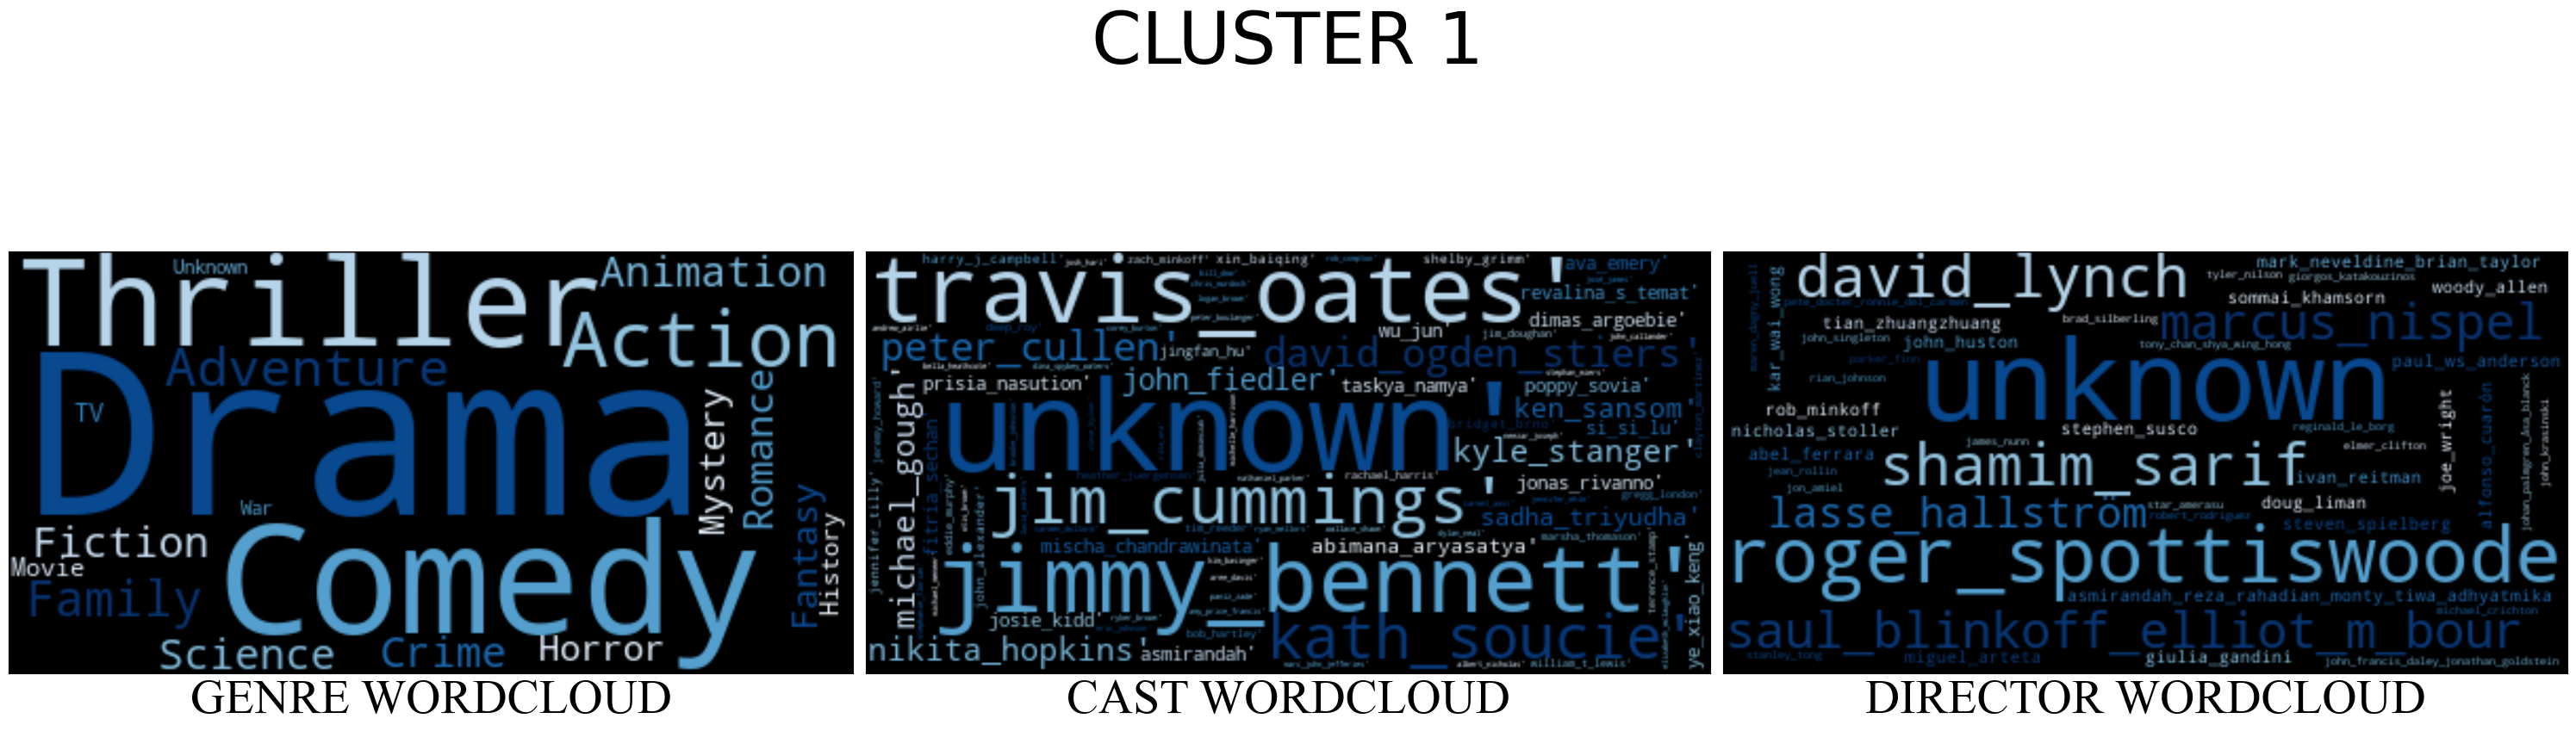

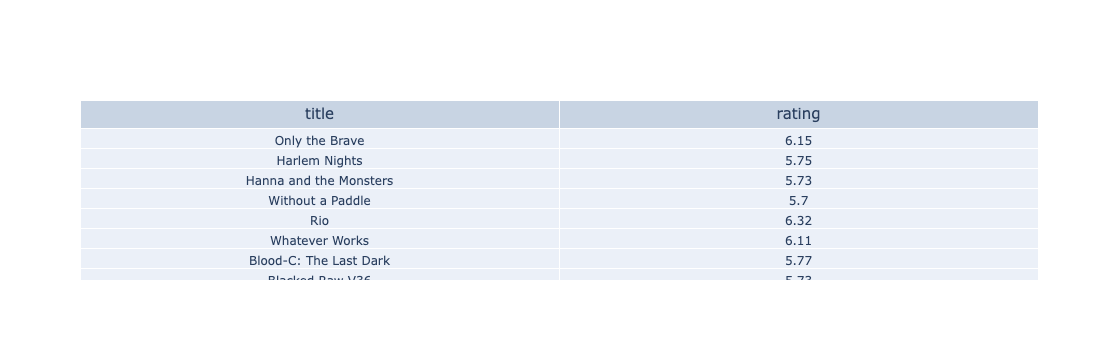

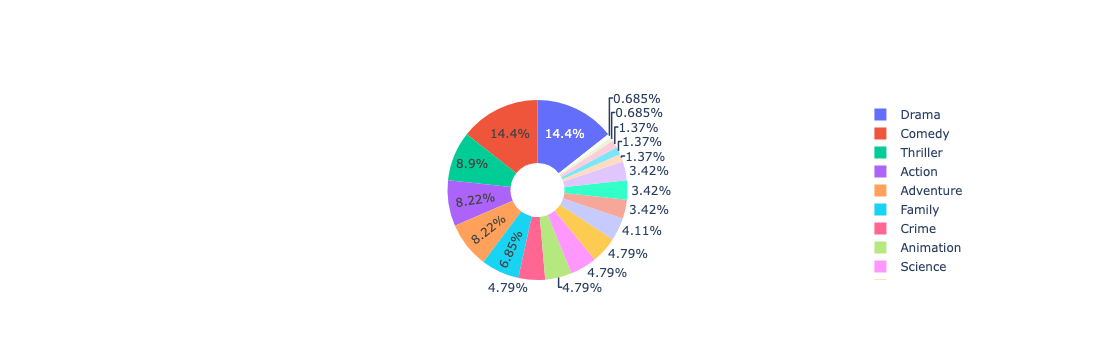

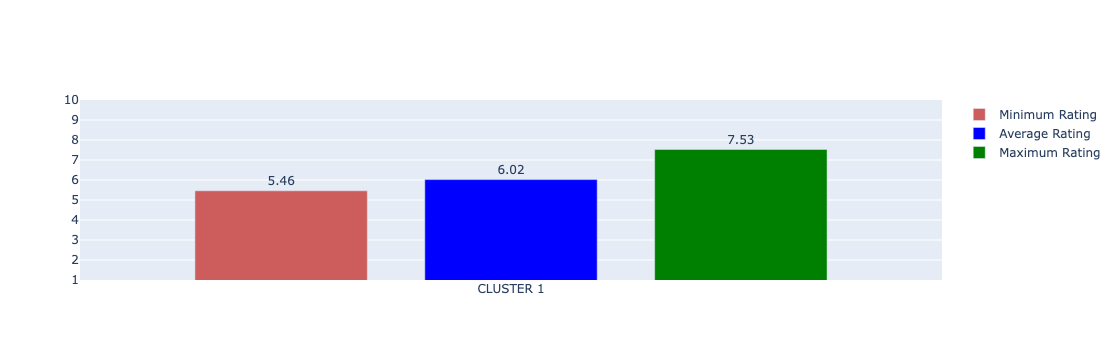

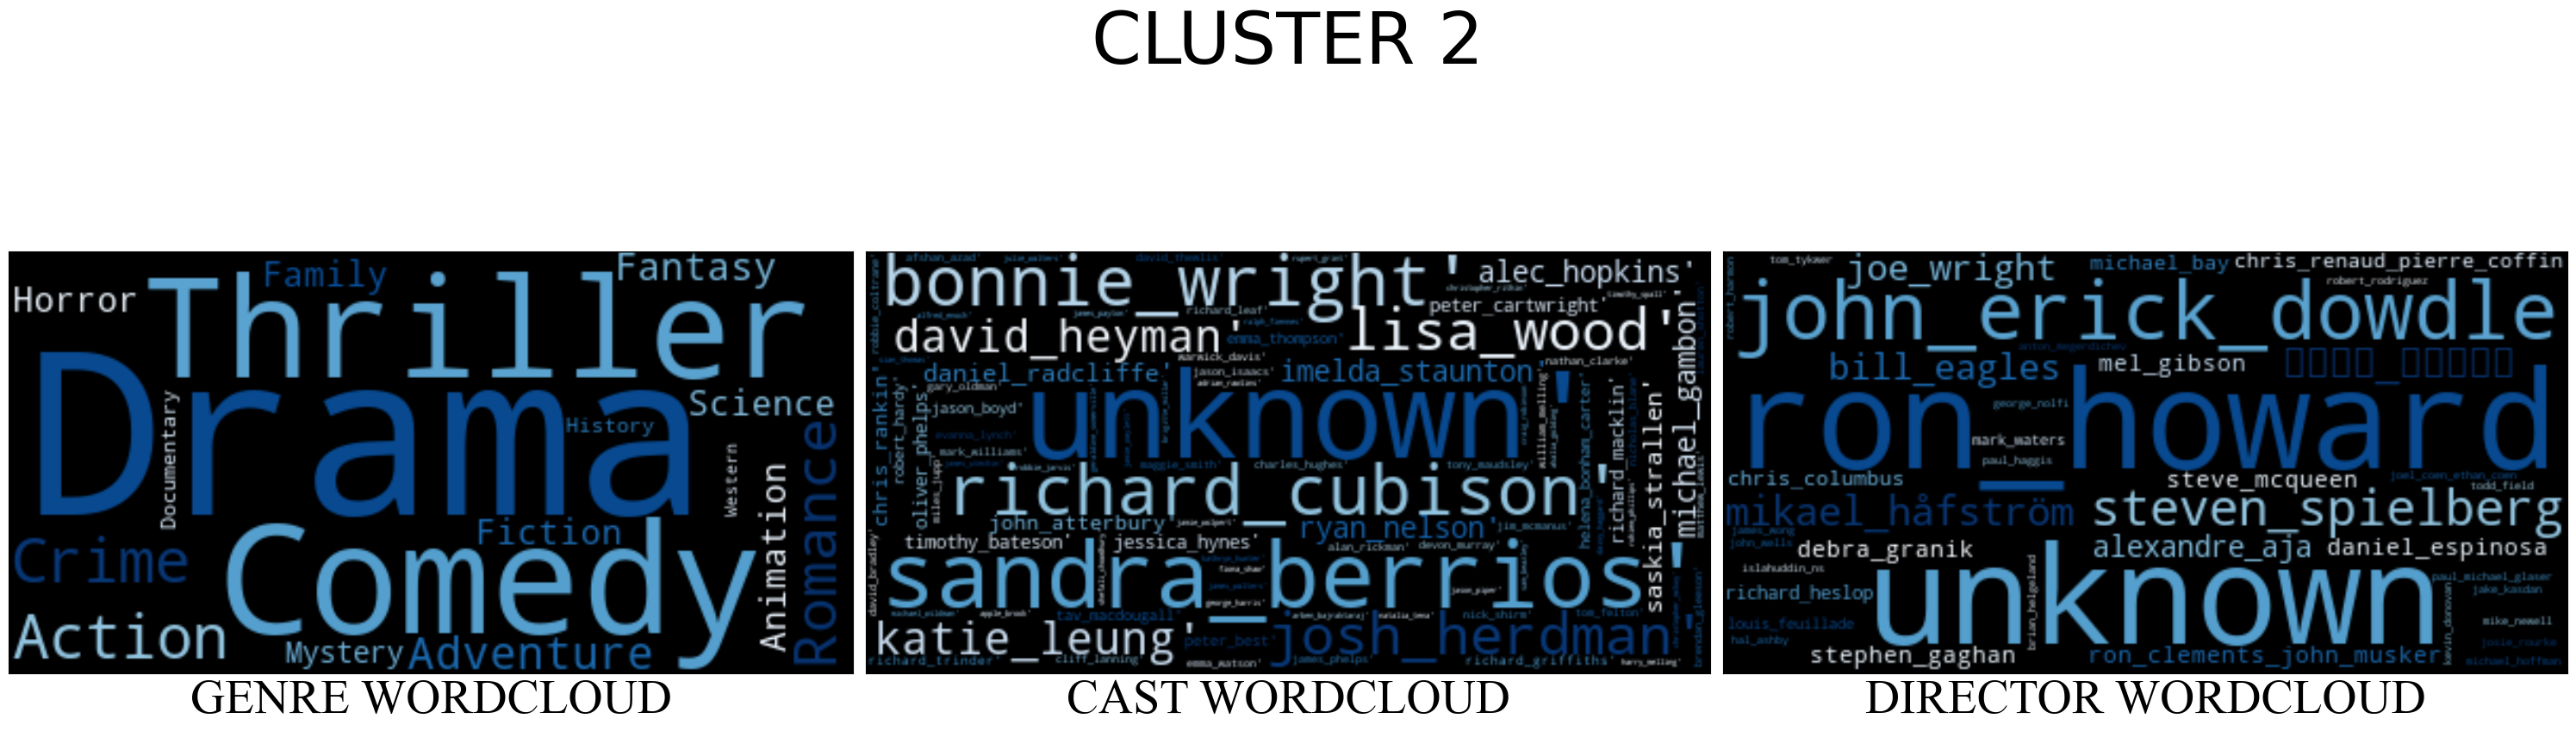

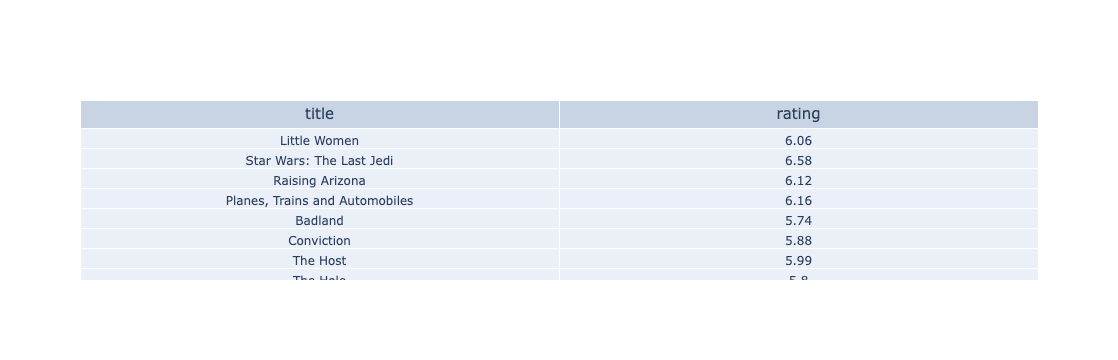

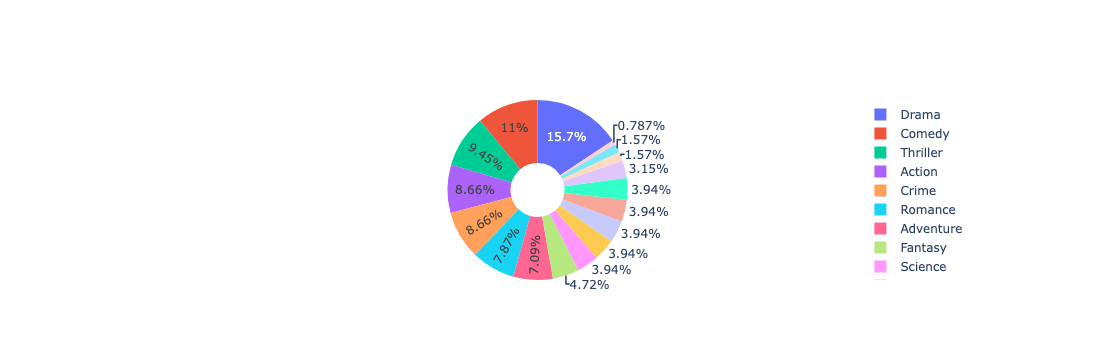

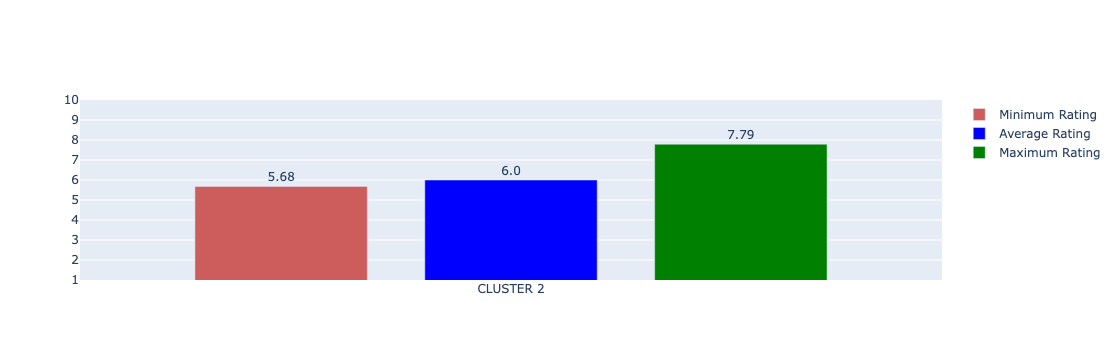

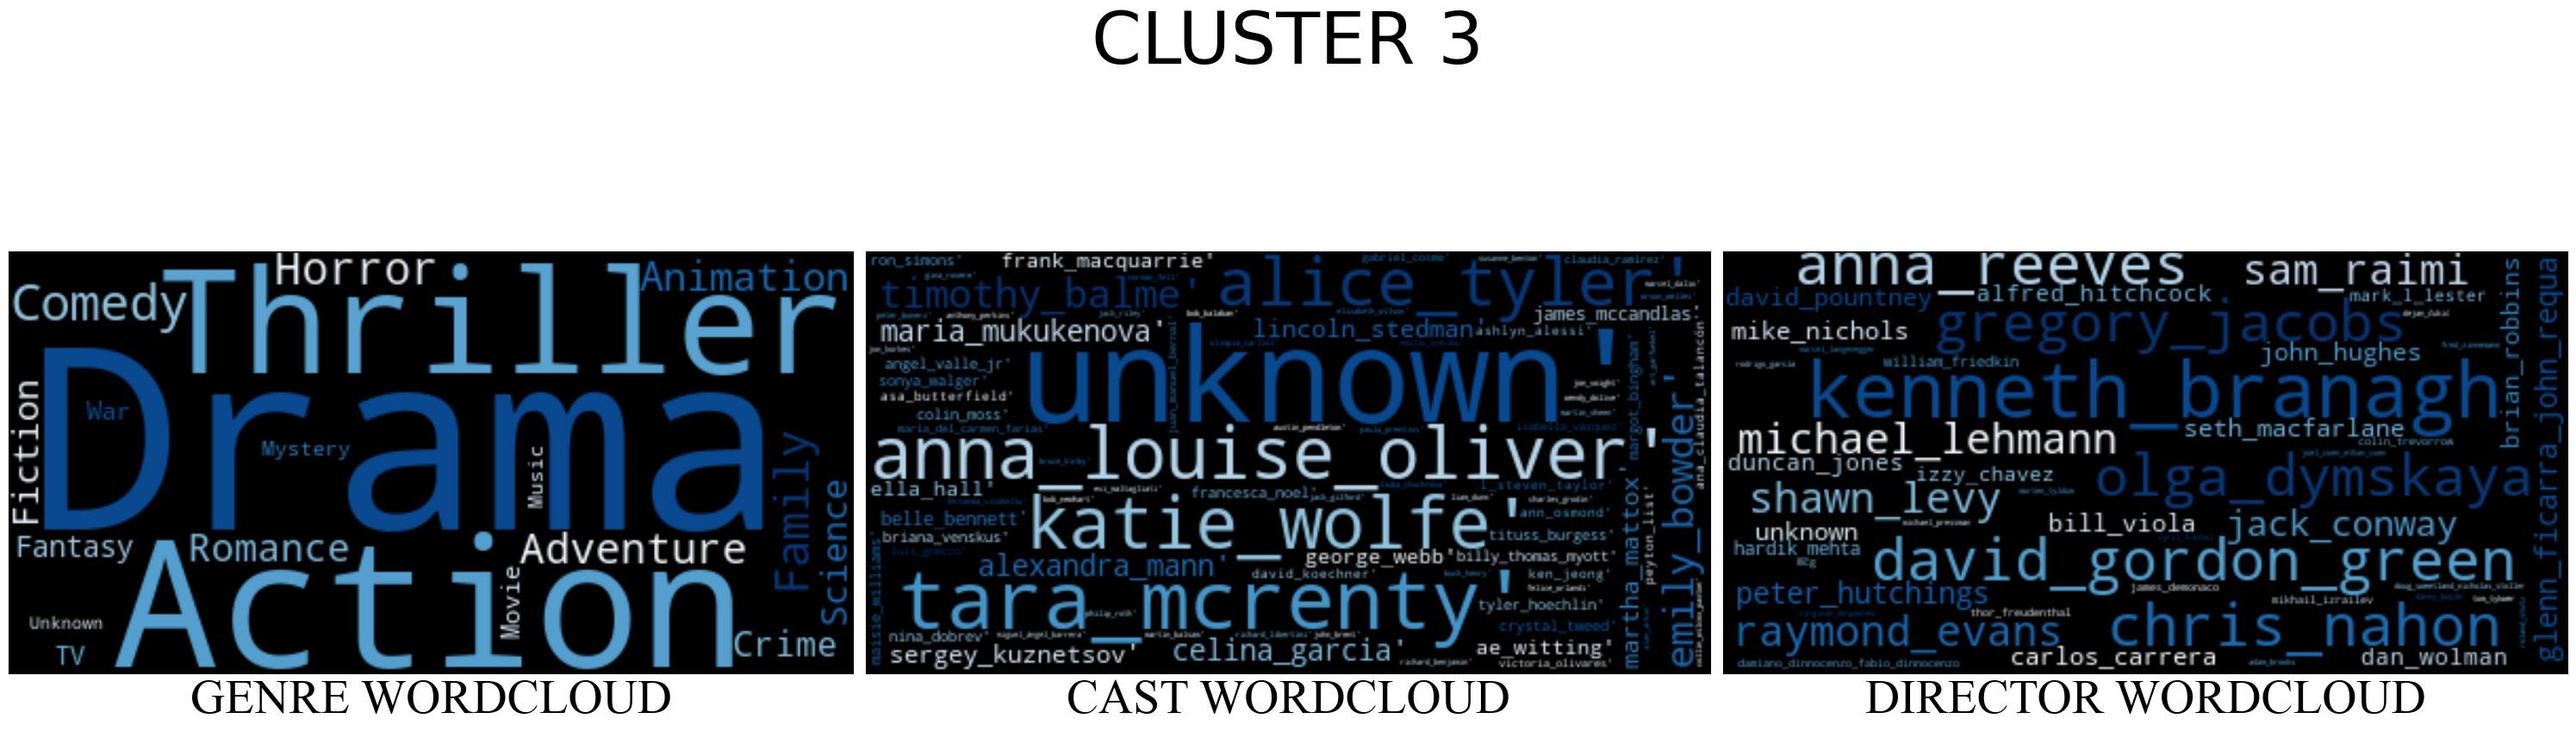

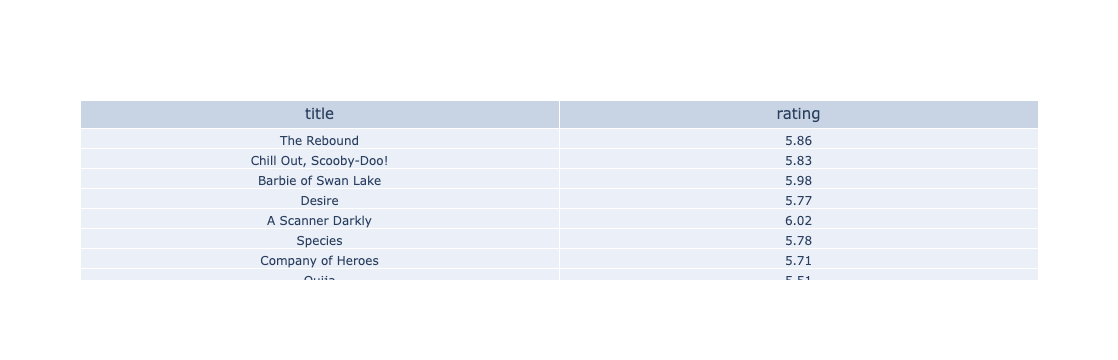

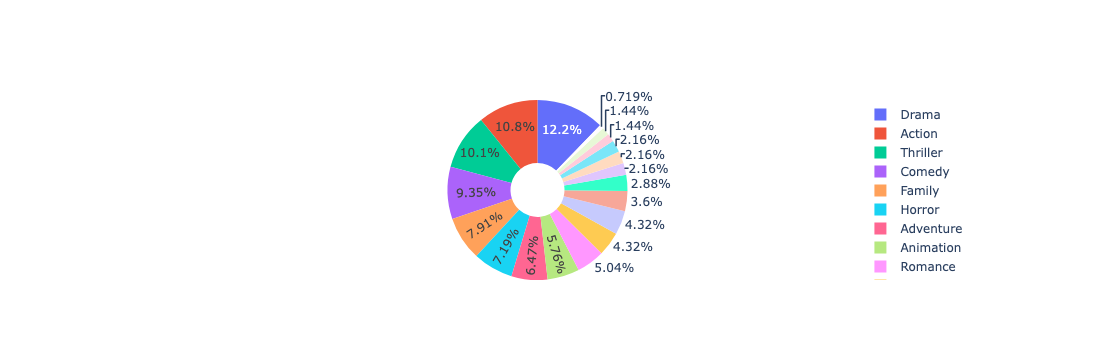

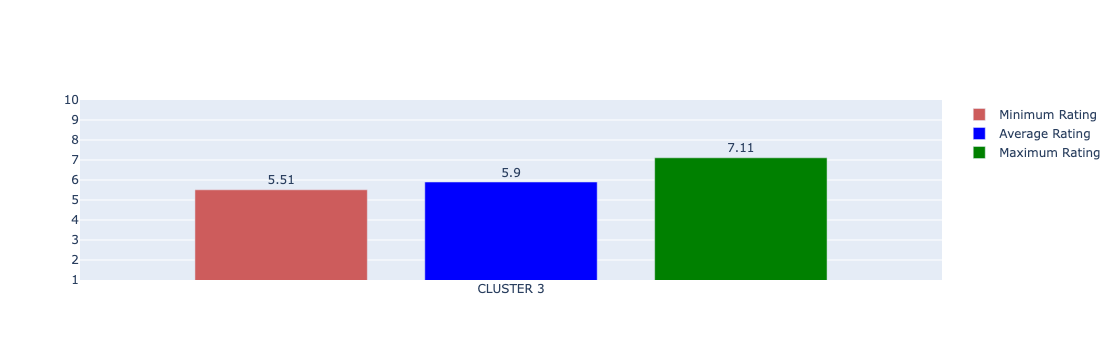

In [91]:
Dashboard("Avatar")

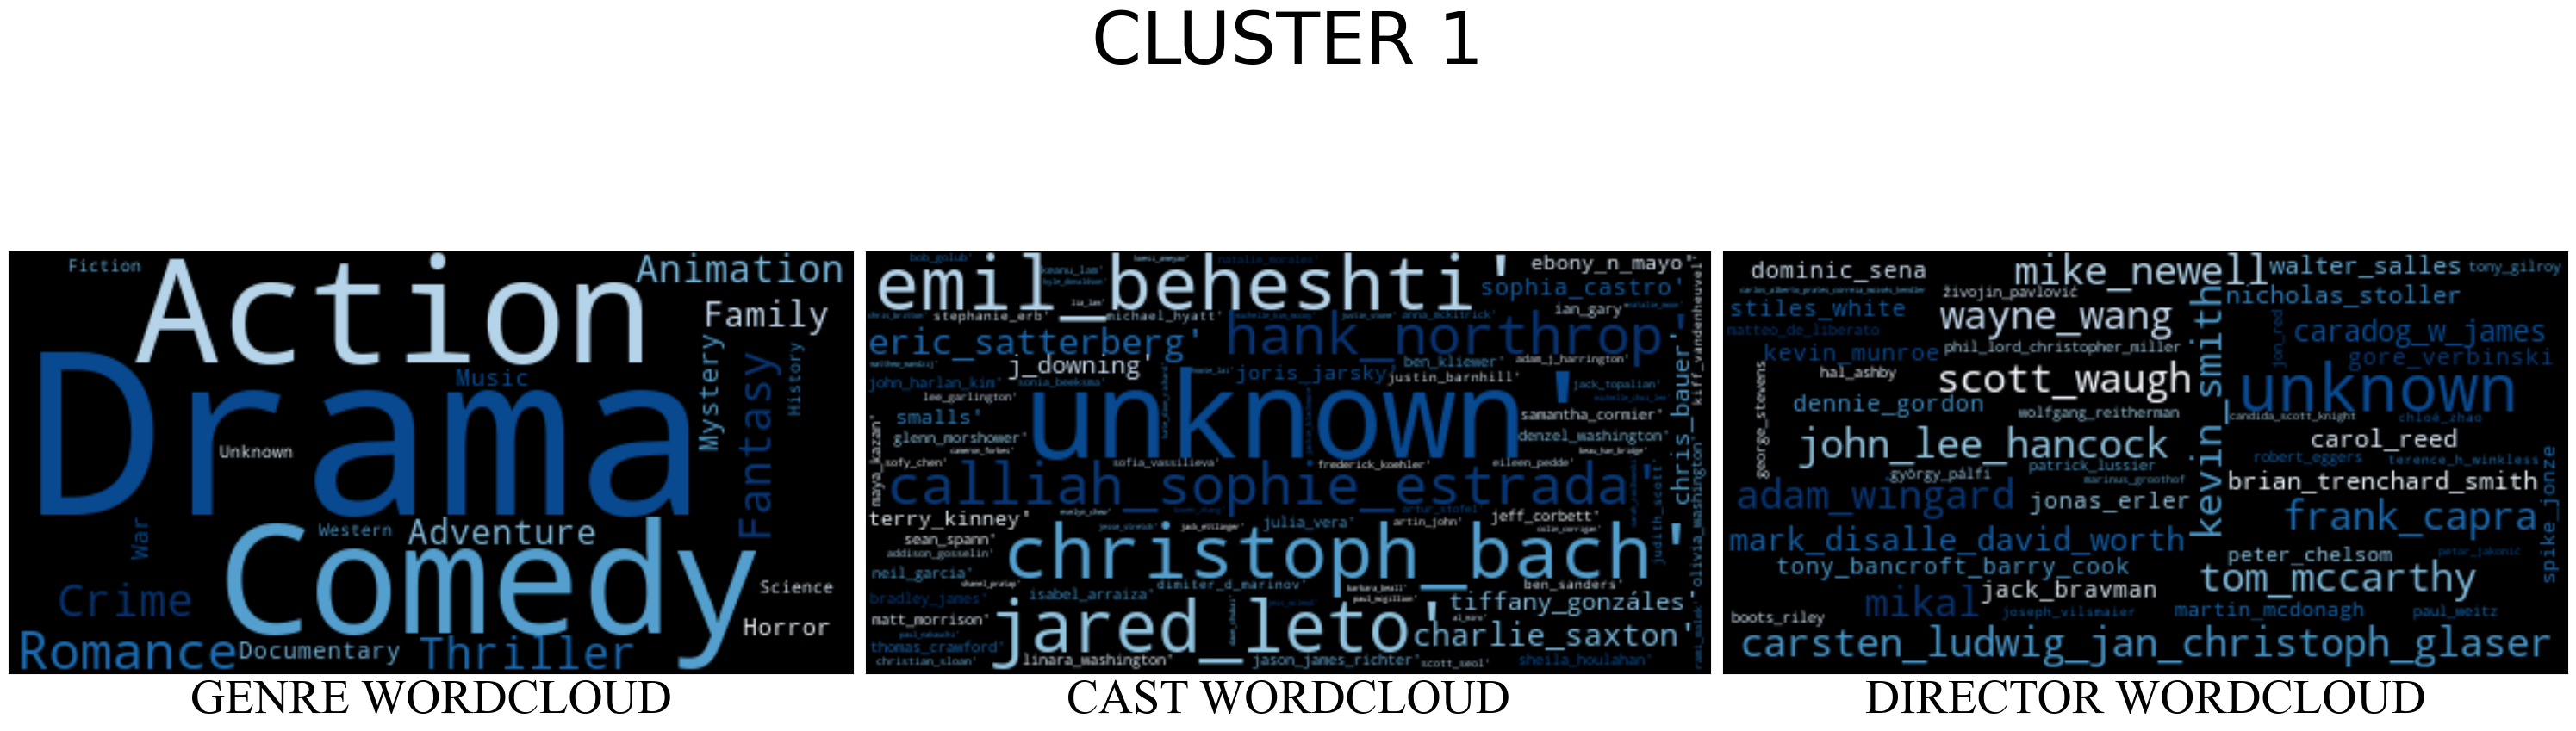

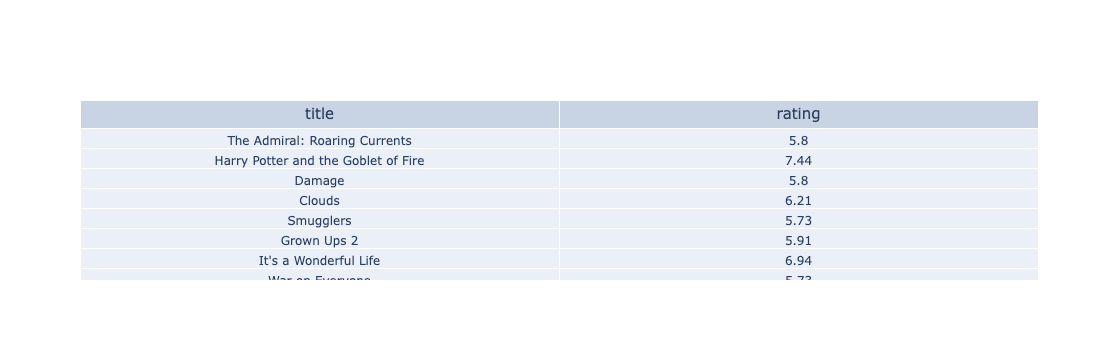

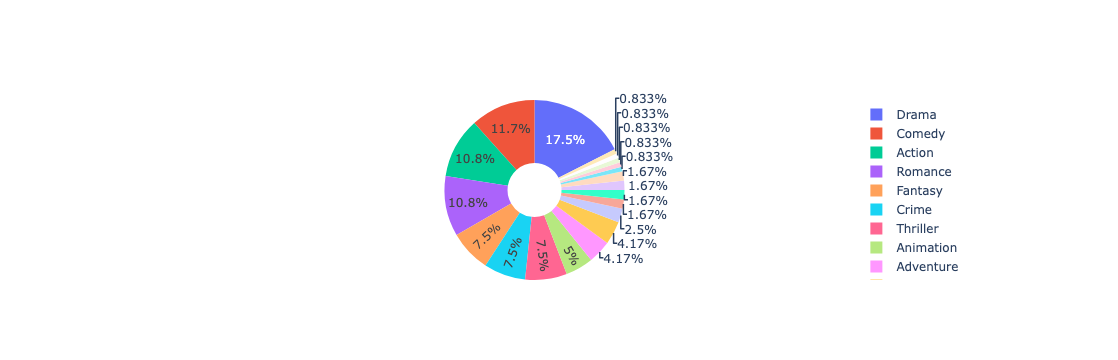

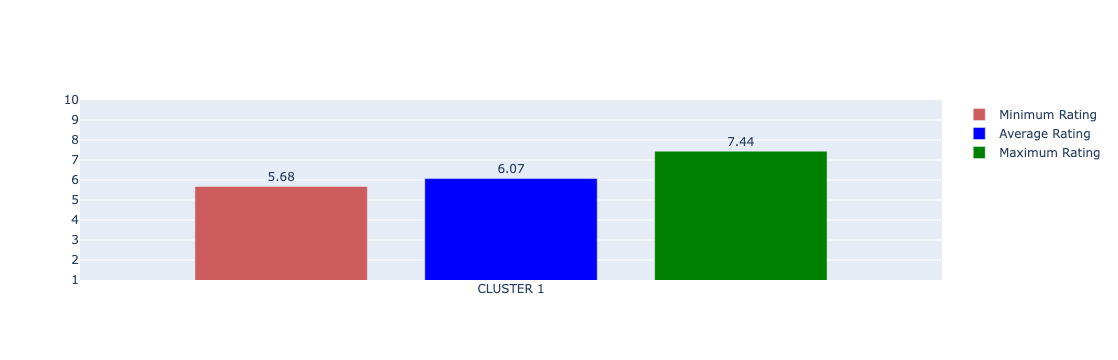

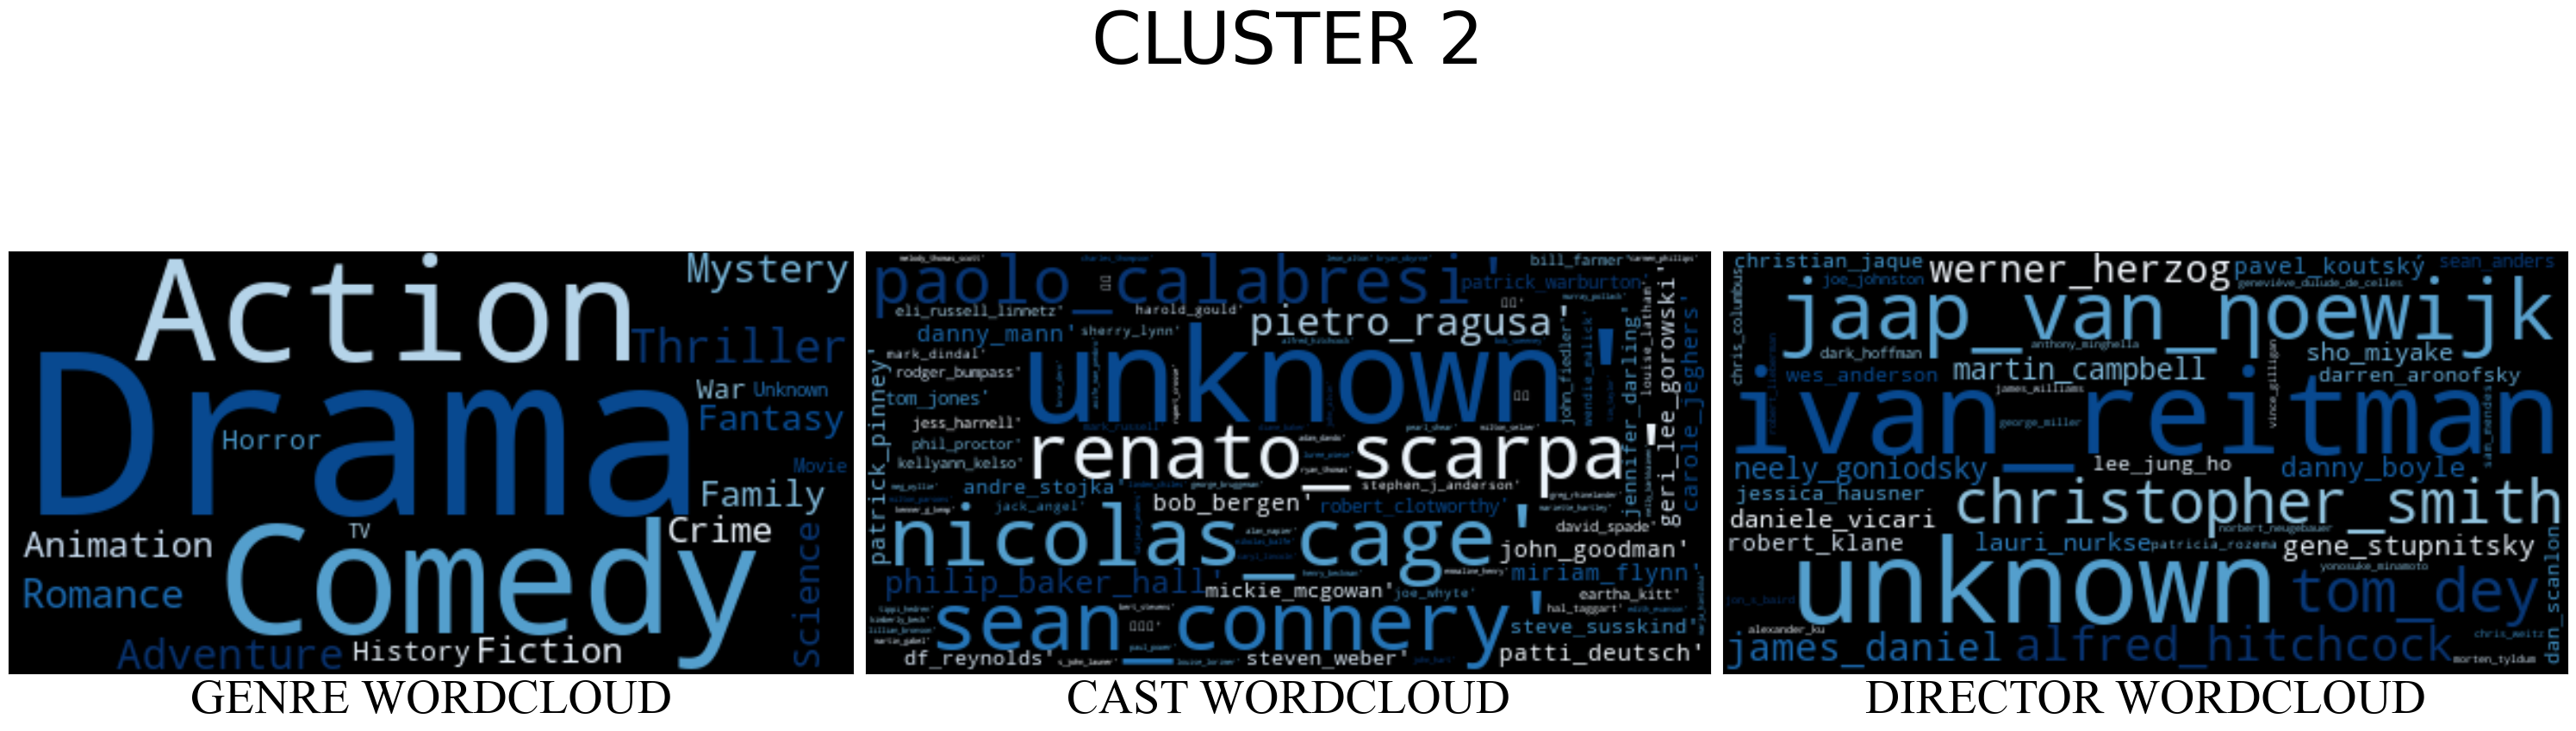

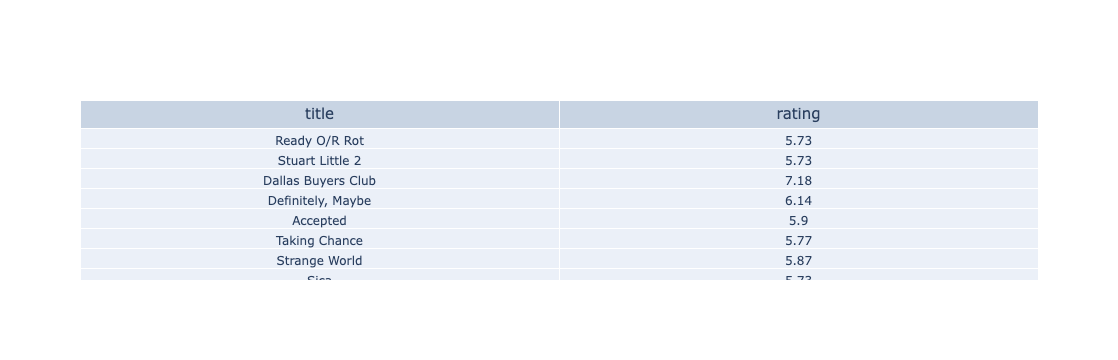

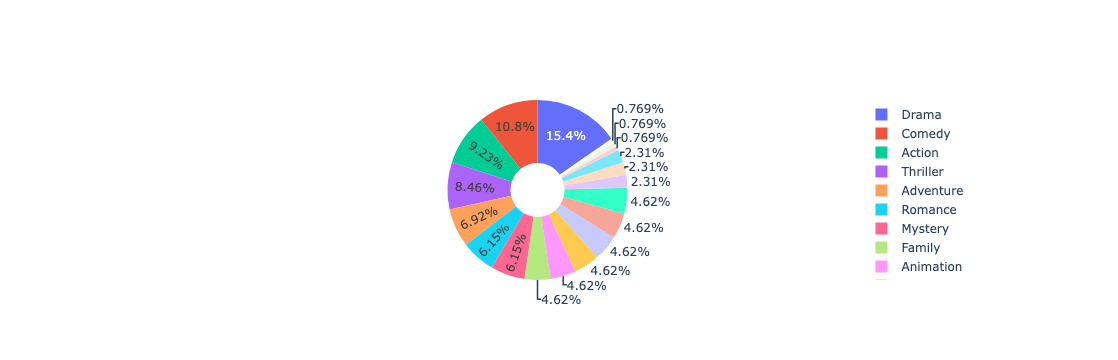

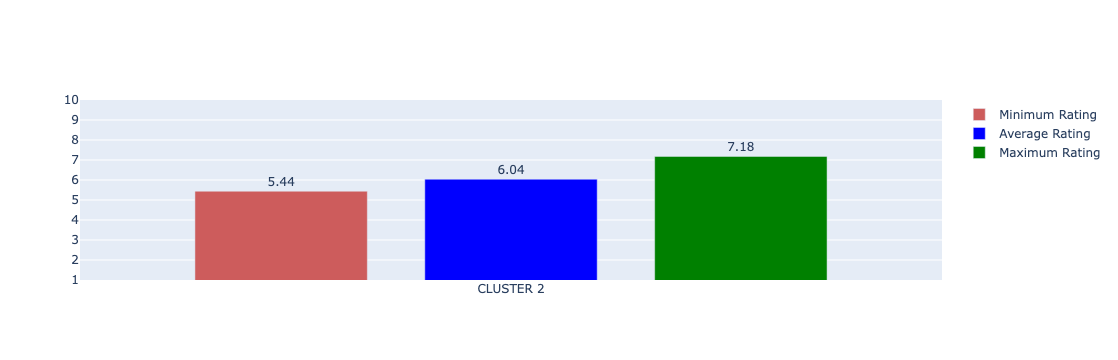

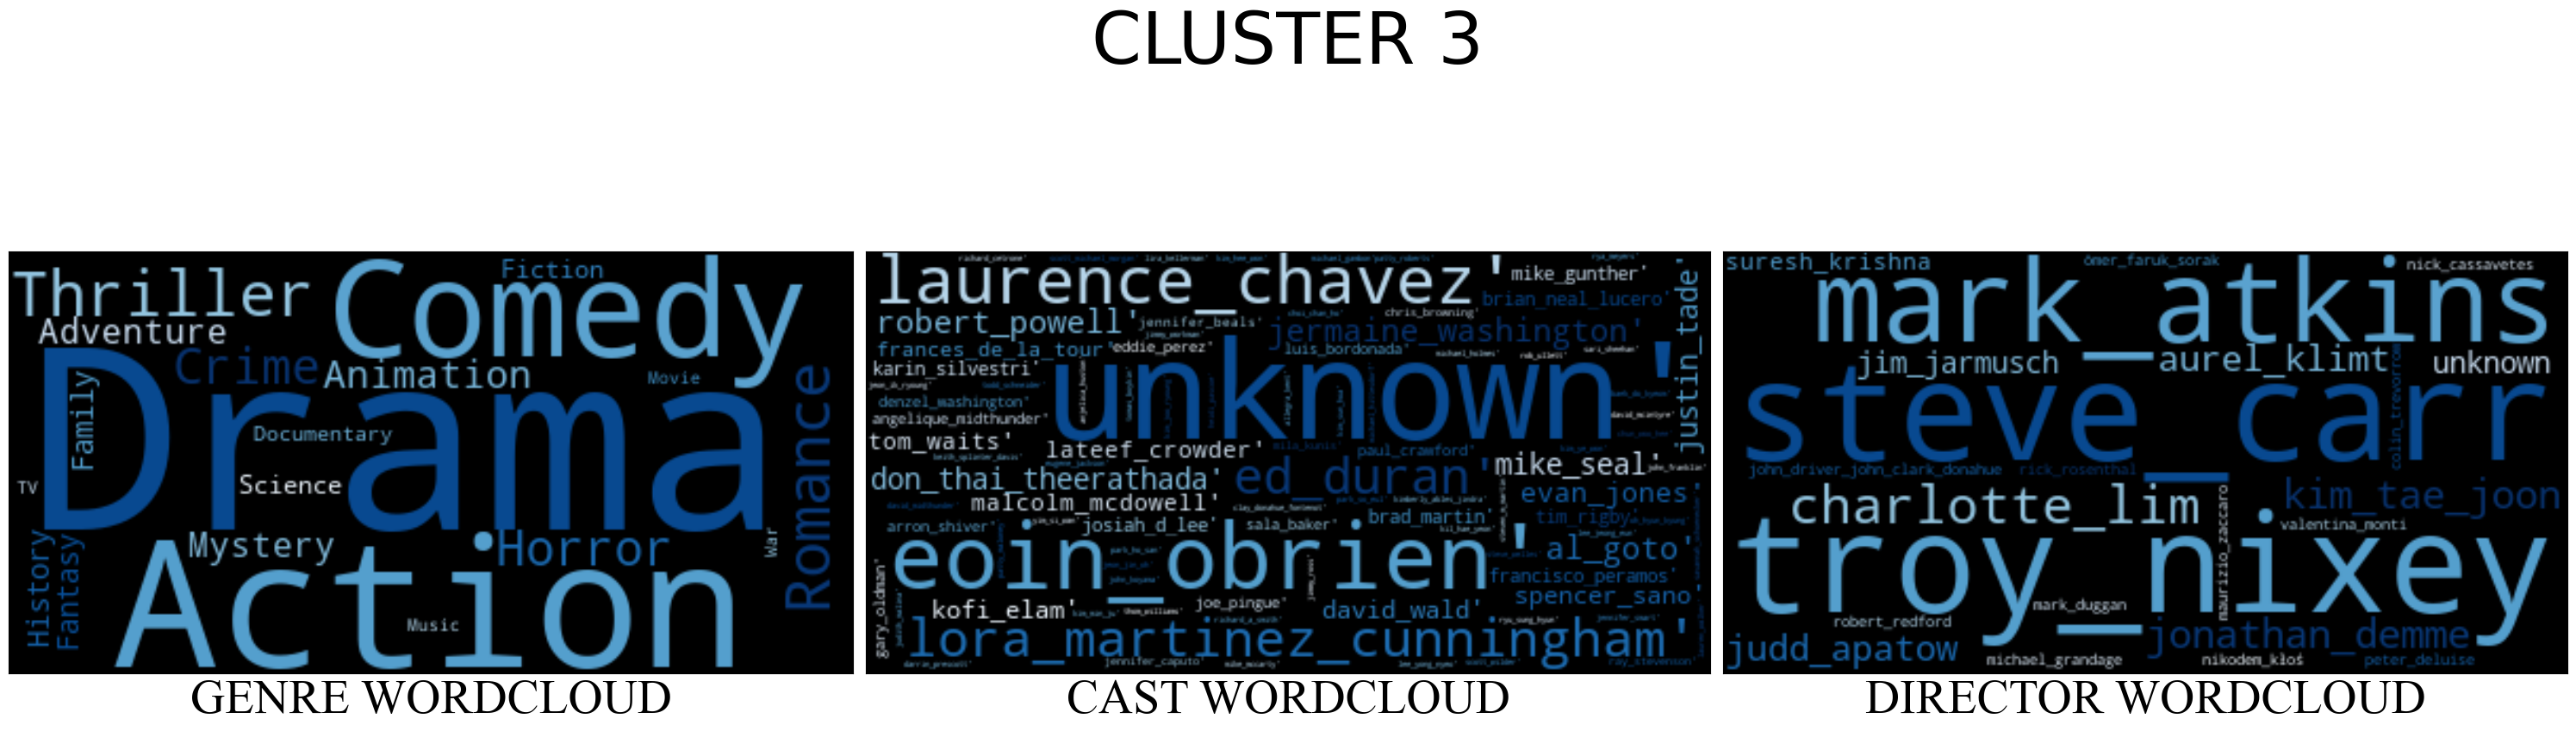

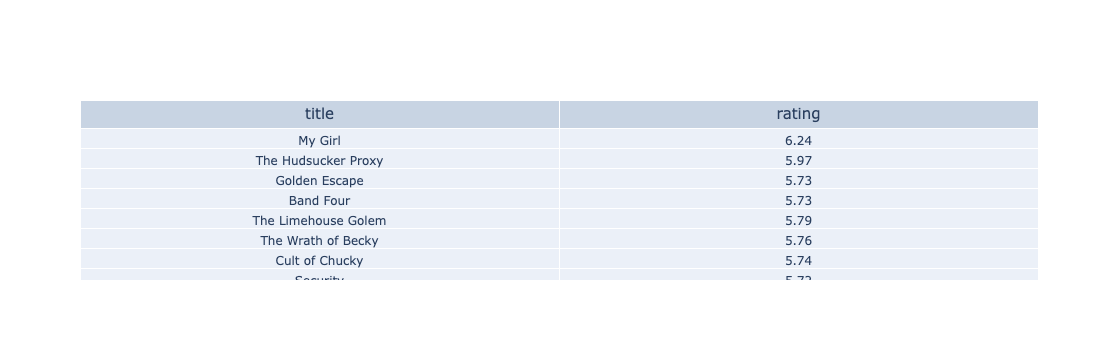

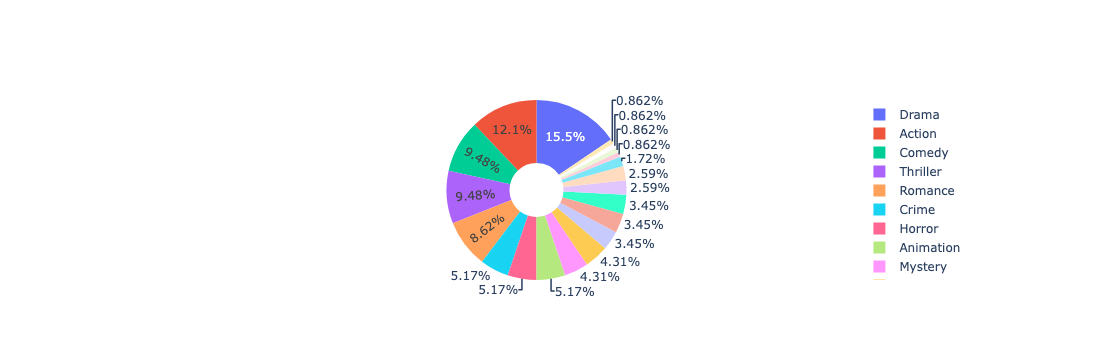

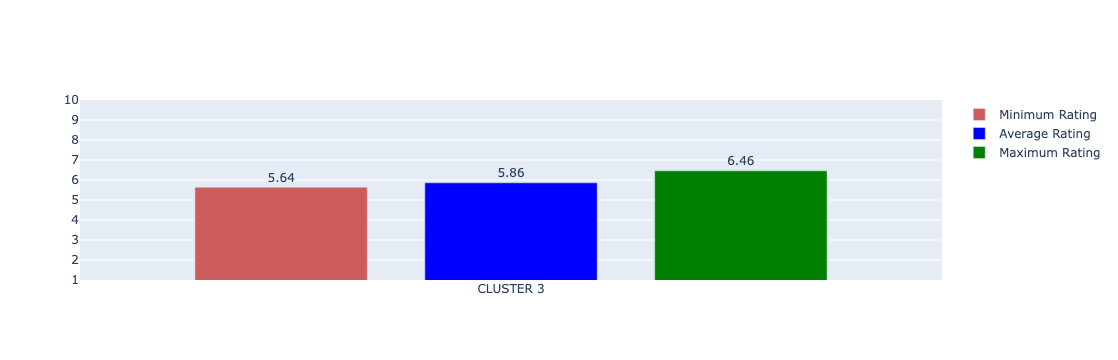

In [92]:
Dashboard("Inception")